# Training Models

## Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly make some data points
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

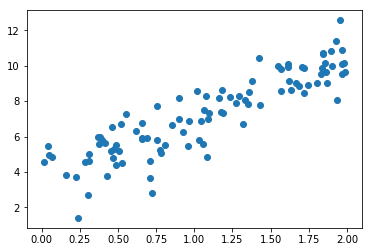

In [5]:
plt.scatter(X, y)
plt.show()

In [13]:
# Find the two coefficients
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [15]:
theta_best

array([[3.60826804],
       [3.38636294]])

In [18]:
# To make predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.60826804],
       [10.38099393]])

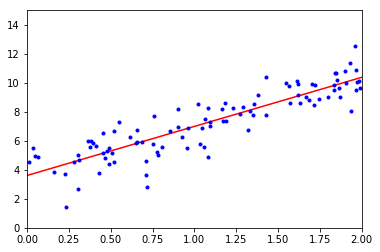

In [19]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

# Using the LinearRegression in sklearn
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.60826804]), array([[3.38636294]]))

In [21]:
lin_reg.predict(X_new)

array([[ 3.60826804],
       [10.38099393]])

In [22]:
# The linear regression class is based on the least square function
theta_best_svd, residuals, rank, s = \
np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.60826804],
       [3.38636294]])

In [23]:
np.linalg.pinv(X_b).dot(y)

array([[3.60826804],
       [3.38636294]])

## Gradient Descent

In [24]:
# Simulate the batch gradient descent
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.60826804],
       [3.38636294]])

In [25]:
# Simulate the Stochastic gradient descent
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):  
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients        
theta

array([[3.58309708],
       [3.43359215]])

In [27]:
from sklearn.linear_model import SGDRegressor

# Use the SGD regressor in sklearn
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, tol=1e-3)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [28]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.54553065]), array([3.31858822]))

## Polynomial Regression

In [45]:
np.random.randn(2)

array([ 0.33356382, -0.34758576])

In [56]:
# Generate some nonlinear data points
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

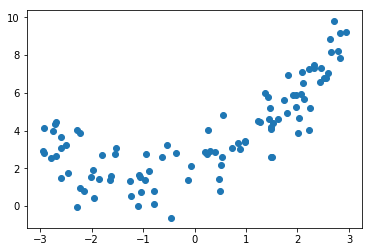

In [57]:
plt.scatter(X, y)
plt.show()

In [58]:
from sklearn.preprocessing import PolynomialFeatures

# Add the square as a second feature
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.52649366])

In [59]:
X_poly[0]

array([1.52649366, 2.33018291])

In [61]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99767265]), array([[0.9454074 , 0.47944838]]))

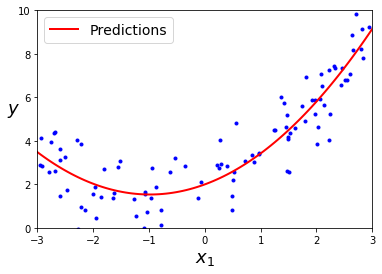

In [62]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## Learning Curve

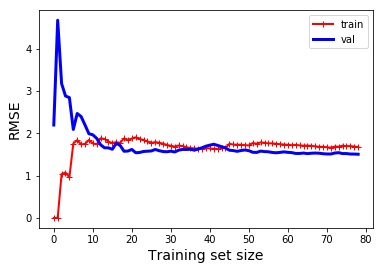

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Plot the learning curve when using linear regression
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)   
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.show()

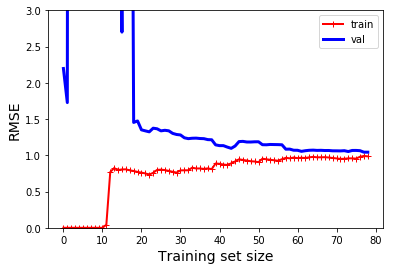

In [73]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10,
                                        include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)
plt.ylim([0, 3])
plt.show()

## Regularized Linear Model

### Ridge

In [75]:
from sklearn.linear_model import Ridge

# Two ways of using ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.05428933]])

In [86]:
sgd_reg = SGDRegressor(penalty='l2', max_iter=1000, tol=1e-3)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.04861025])

### Lasso

In [88]:
from sklearn.linear_model import Lasso

# Two ways of using Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.01945968])

In [89]:
sgd_reg = SGDRegressor(penalty='l1', max_iter=1000, tol=1e-3)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.0226396])

### Elastic Net

In [90]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.02154005])

### Early Stopping

In [94]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = \
train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [95]:
best_epoch, best_model

(10,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
        eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
        learning_rate='constant', loss='squared_loss', max_iter=1,
        n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
        random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
        verbose=0, warm_start=True))

## Logistic Regression

Example building a logistic regression model using the IRIS dataset.

In [96]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [102]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [104]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

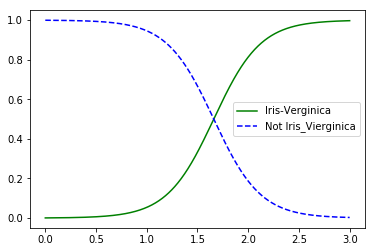

In [113]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Verginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris_Vierginica')
plt.legend()
plt.show()

### Softmax Regression

In [114]:
X = iris['data'][:, (2, 3)] # petal length and width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [115]:
softmax_reg.predict([[5, 2]])

array([2])

In [116]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])